<a href="https://www.kaggle.com/code/udayr007/walmartsalesforecast?scriptVersionId=150088284" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# importing variables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import simplefilter
simplefilter('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# display the visualization in good quality of image
%matplotlib inline
%config InlineBackend.figure_formats = 'retina'

In [3]:
dataset = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/train.csv.zip", names = ['Store','Dept','Date','Weekly_Sales','IsHoliday'], sep = ',', header=0)
features = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/features.csv.zip", names = ['Store', 'Date','Temperature','Fuel_Price', 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','IsHoliday'], sep=',', header = 0).drop(columns=['IsHoliday'])

In [4]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
# Shape of the dataset
dataset.shape

(421570, 5)

In [6]:
# Checking the missing values for dataset table
dataset.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [7]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [8]:
features.shape

(8190, 11)

In [9]:
# Checking the missing values for features table
missing_values = features.isnull().sum()
missing_values

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
dtype: int64

In [10]:
missing_values[missing_values > 0]

MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
dtype: int64

In [11]:
# total values in the dataset
total_values = np.product(features.shape)
total_values

90090

In [12]:
# total sum of the values
total_sum = missing_values.sum()
total_sum

24040

In [13]:
# total percentage of missing values
percent = (total_sum / total_values) * 100
percent

26.684426684426683

In [14]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [15]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [16]:
dataset.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [17]:
features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [18]:
stores = pd.read_csv("../input/walmart-recruiting-store-sales-forecasting/stores.csv", names = ['Store','Type','Size'], sep = ',', header=0)
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [19]:
dataset = dataset.merge(stores, how='left').merge(features, how = 'left')
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [20]:
dataset.shape

(421570, 16)

In [21]:
dataset.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [22]:
# Lets Explore the Data
def scatter(dataset, columns):
  plt.figure()
  plt.scatter(dataset[columns], dataset['Weekly_Sales'])
  plt.ylabel('Weekly Sales')
  plt.xlabel(columns)

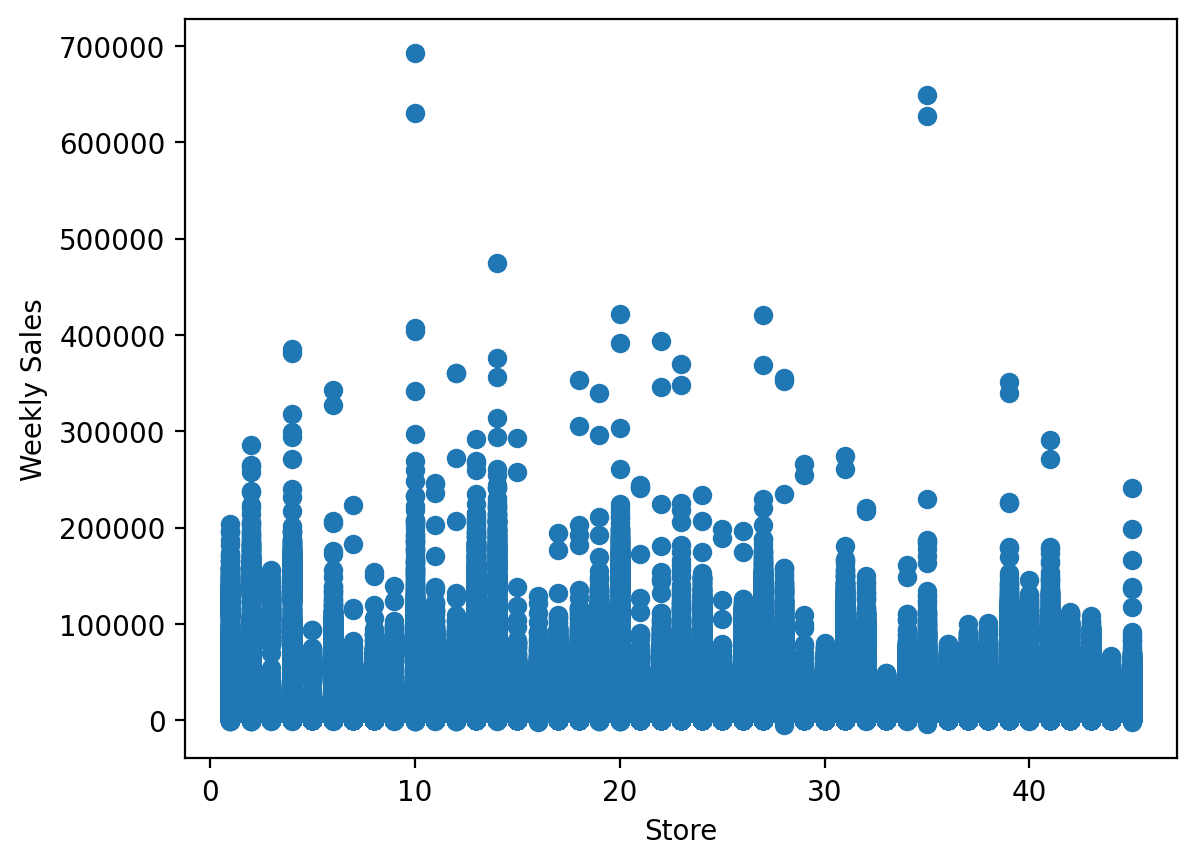

In [23]:
scatter(dataset, 'Store')

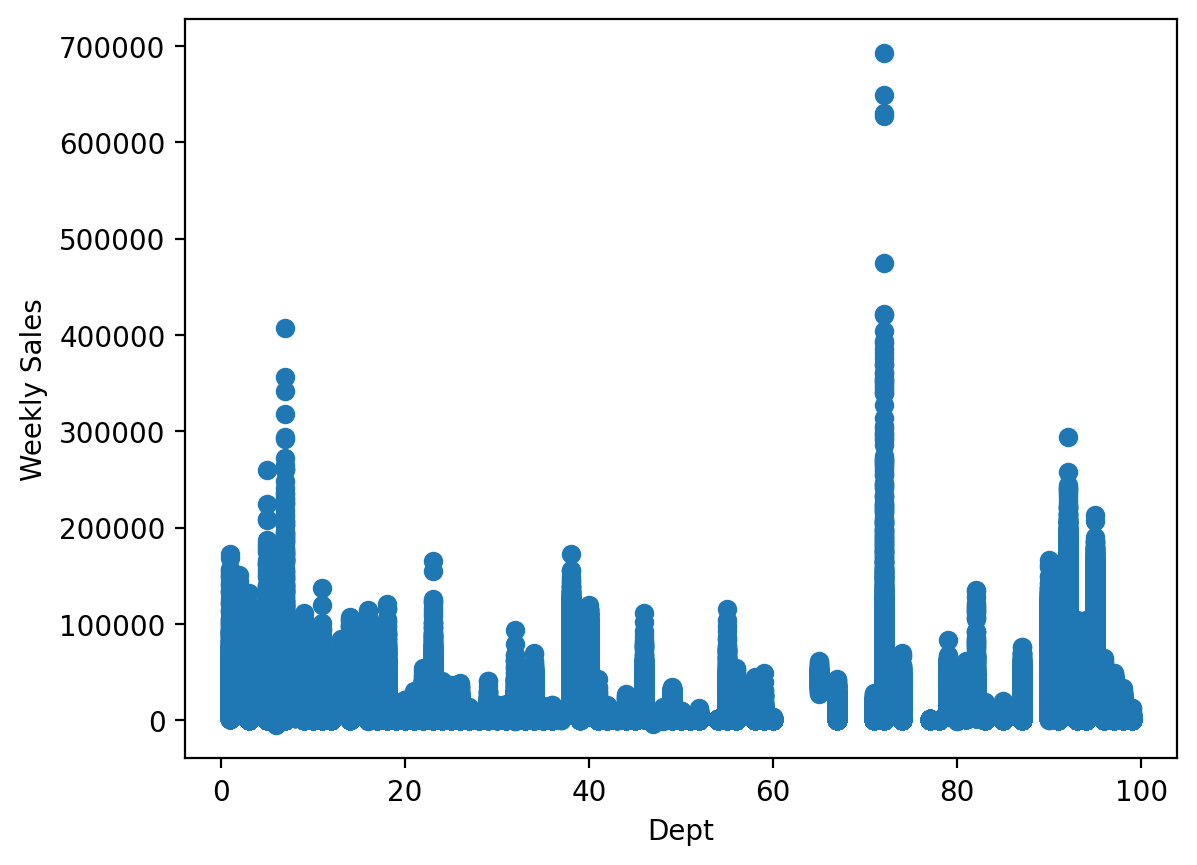

In [24]:
scatter(dataset, 'Dept')

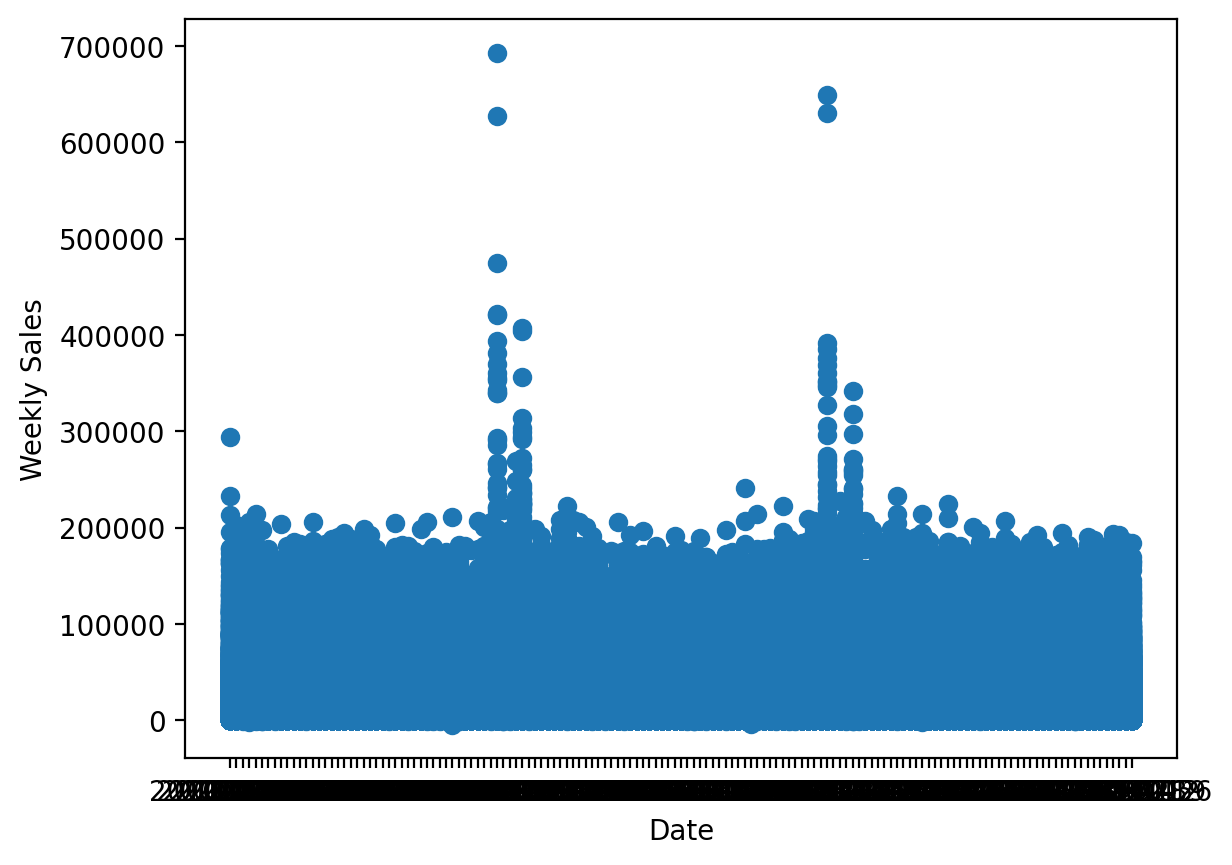

In [25]:
scatter(dataset, 'Date')

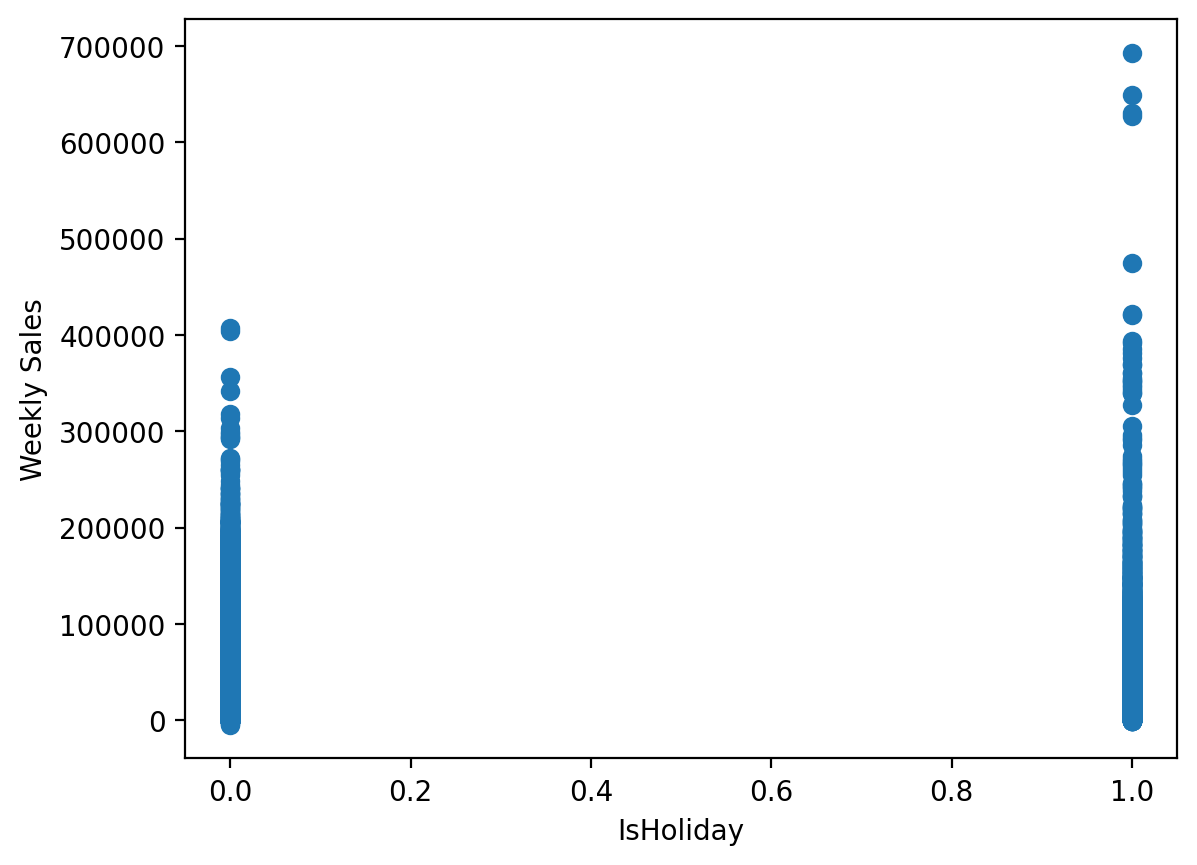

In [26]:
scatter(dataset, 'IsHoliday')

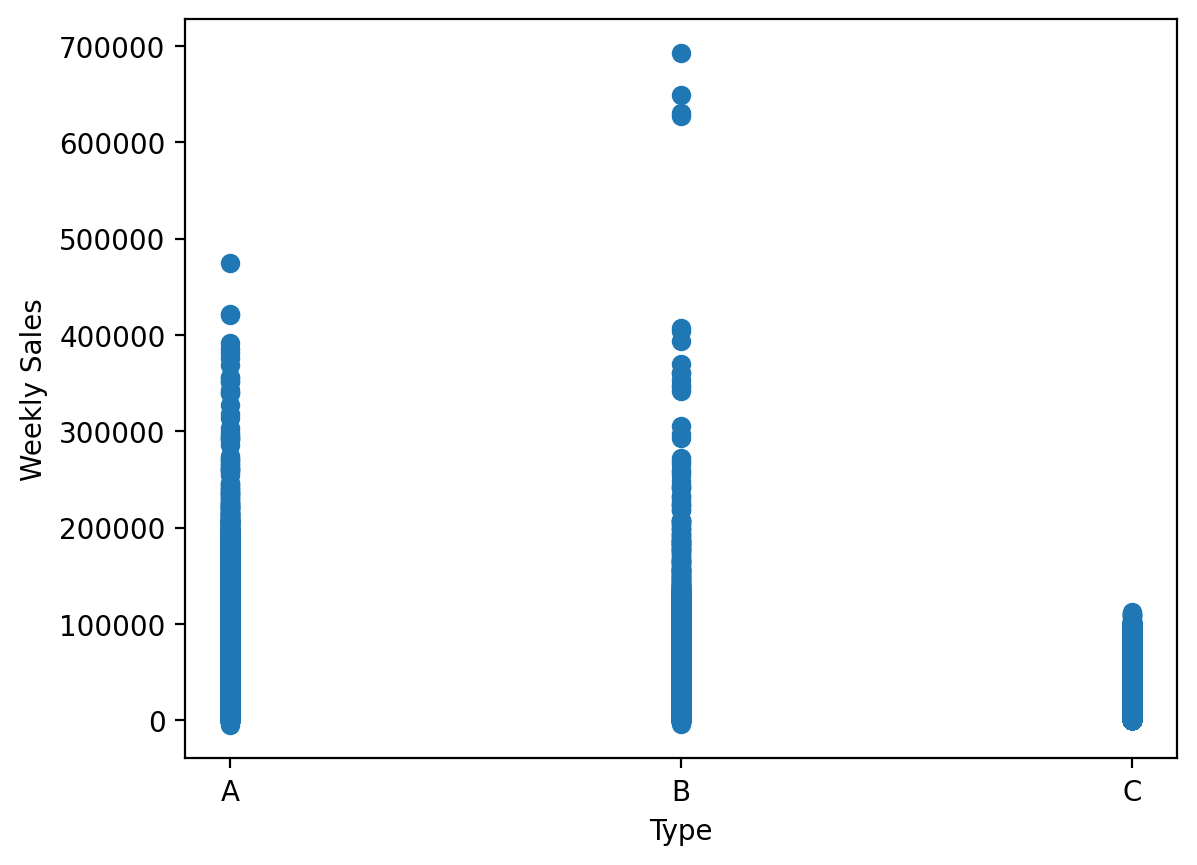

In [27]:
scatter(dataset, 'Type')

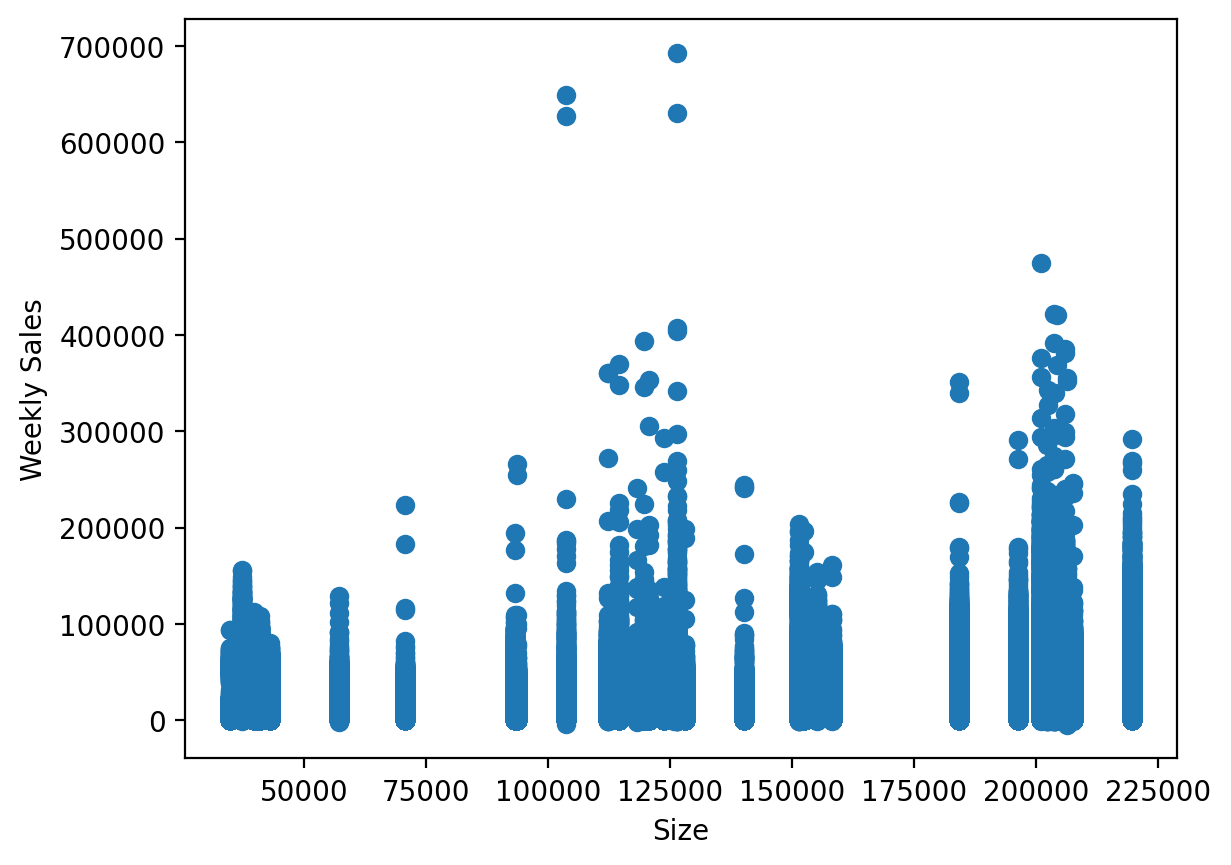

In [28]:
scatter(dataset, 'Size')

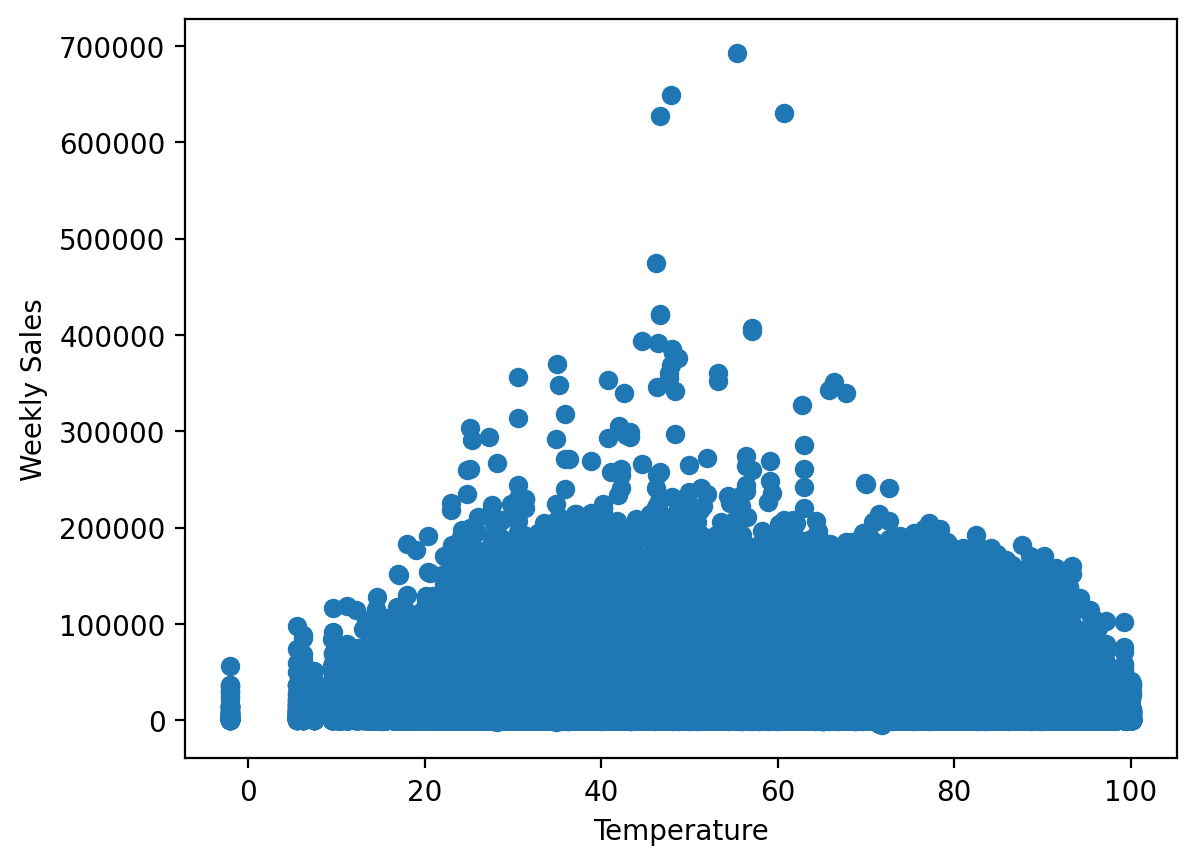

In [29]:
scatter(dataset, 'Temperature')

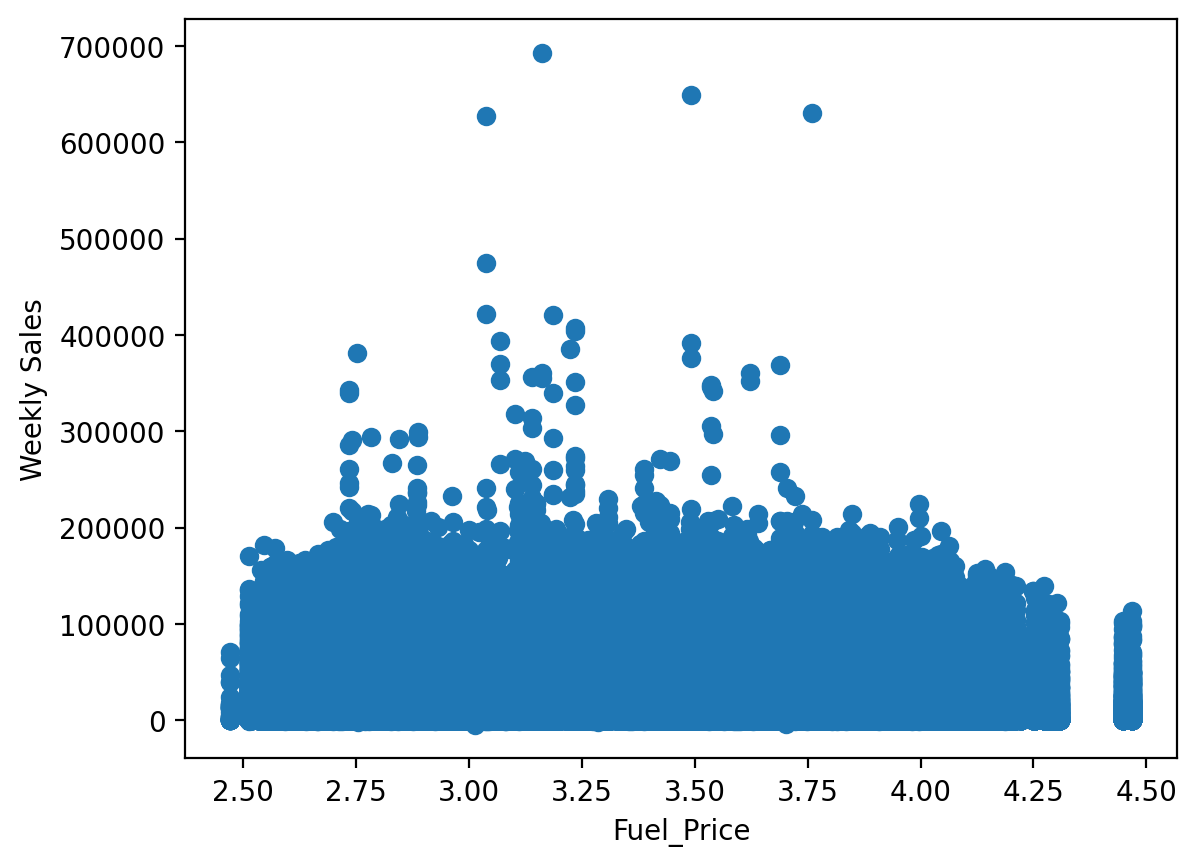

In [30]:
scatter(dataset, 'Fuel_Price')

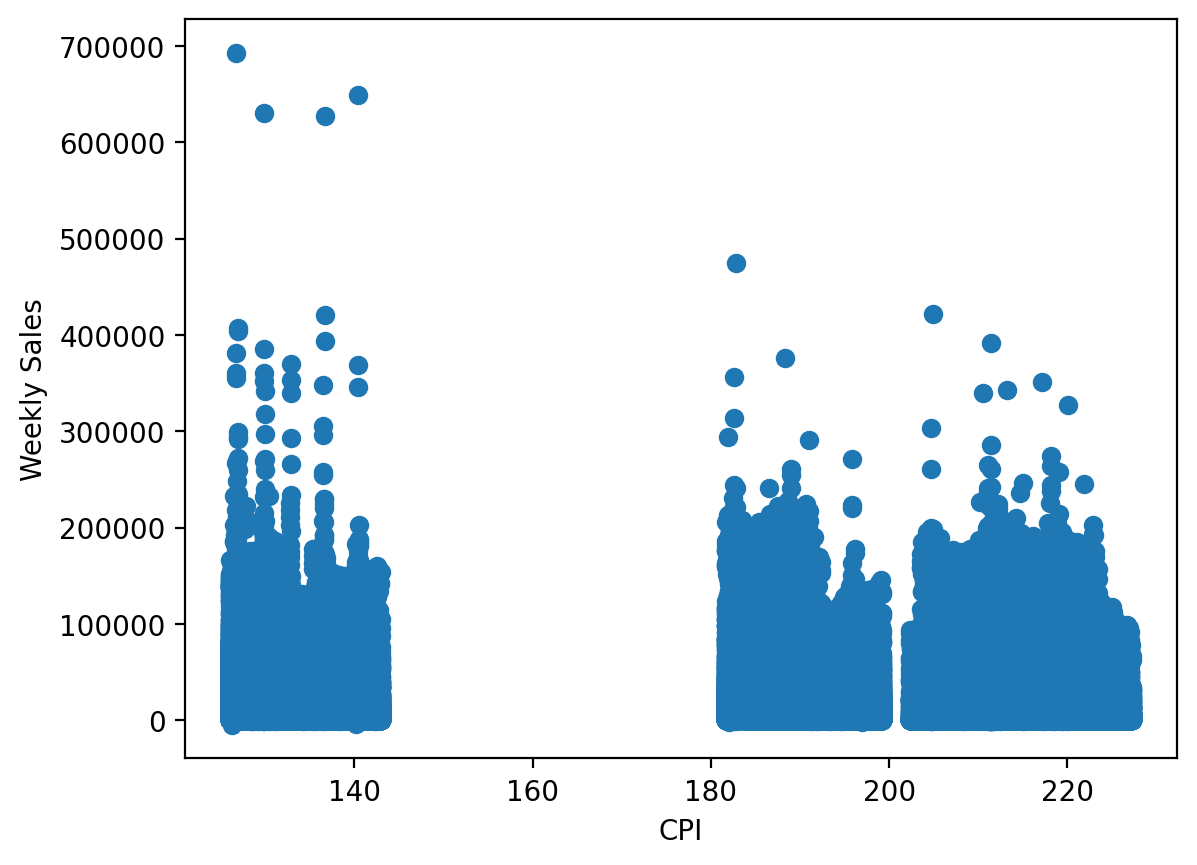

In [31]:
scatter(dataset, 'CPI')

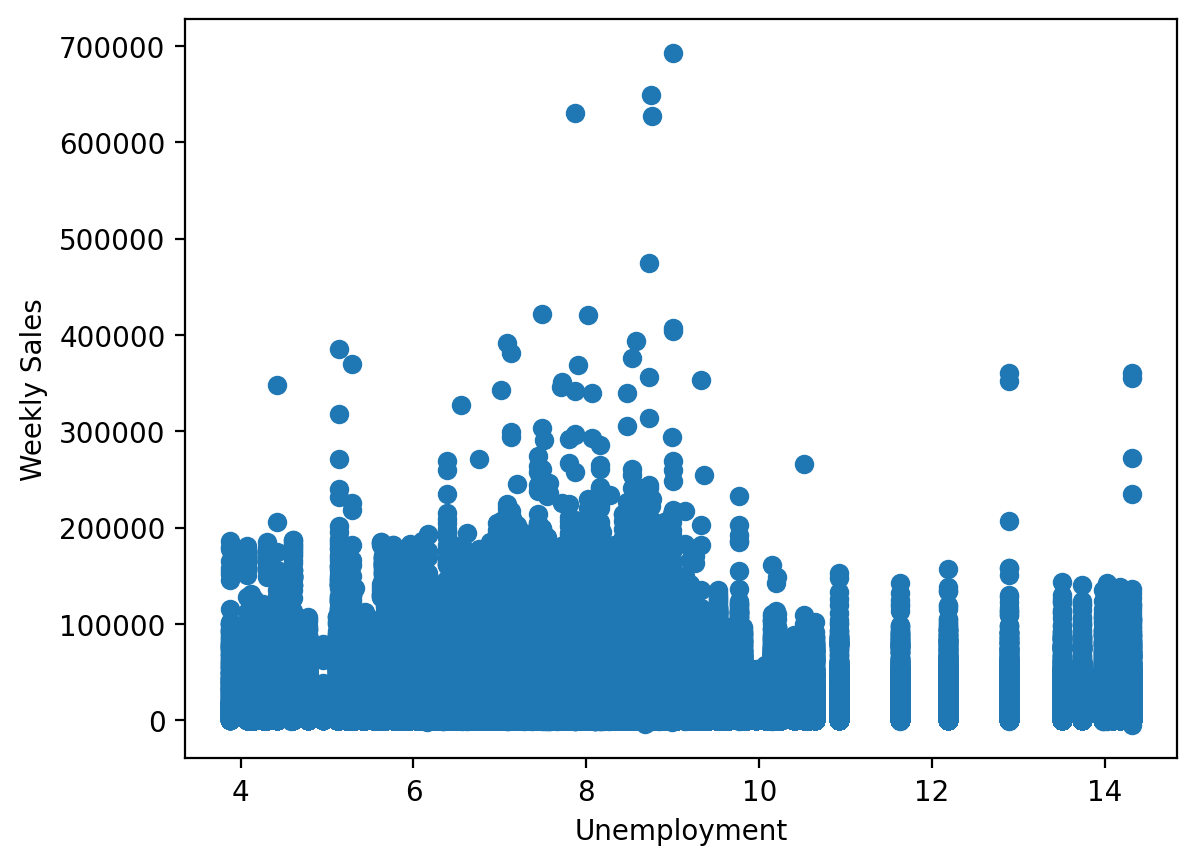

In [32]:
scatter(dataset, 'Unemployment')